<a href="https://colab.research.google.com/github/cheersbuddy/Dataset_Analysis/blob/main/sowmiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset
**Description:**

Welcome to the Diabetes Prediction Dataset, a valuable resource for researchers, data scientists, and medical professionals interested in the field of diabetes risk assessment and prediction. This dataset contains a diverse range of health-related attributes, meticulously collected to aid in the development of predictive models for identifying individuals at risk of diabetes. By sharing this dataset, we aim to foster collaboration and innovation within the data science community, leading to improved early diagnosis and personalized treatment strategies for diabetes. Columns:

- Id: Unique identifier for each data entry.
- Pregnancies: Number of times pregnant.
- Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
- BloodPressure: Diastolic blood pressure (mm Hg).
- SkinThickness: Triceps skinfold thickness (mm).
- Insulin: 2-Hour serum insulin (mu U/ml). BMI: Body mass index (weight in kg / height in m^2).
- DiabetesPedigreeFunction: Diabetes pedigree function, a genetic score of diabetes.
- Age: Age in years.
- Outcome: Binary classification indicating the presence (1) or absence (0) of diabetes.








In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df= pd.read_csv("/content/Healthcare-Diabetes.csv")
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [ ]:
df.shape

(2768, 10)

In [ ]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#  Data type Mismatch
print("Data types:\n", df.dtypes)

Data types:
 Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
#  Finding Duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

#  Finding Irrelevant data
irrelevant_columns = [col for col in df.columns if df[col].unique().size == 1] # Use .unique().size on Series
print("Irrelevant columns:", irrelevant_columns)

Number of duplicate rows: 0
Irrelevant columns: []


In [ ]:
# Check for null values in each column
null_values = df.isnull().sum()

# Print the number of null values in each column
print(null_values)

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Number of outliers in Glucose: 1334
Number of outliers in BloodPressure: 1155
Number of outliers in SkinThickness: 685
Number of outliers in Insulin: 669
Number of outliers in BMI: 1371
Number of outliers in DiabetesPedigreeFunction: 1380
Number of outliers in Age: 1319
Number of outliers before handling: 10279
Number of outliers after handling: 10279


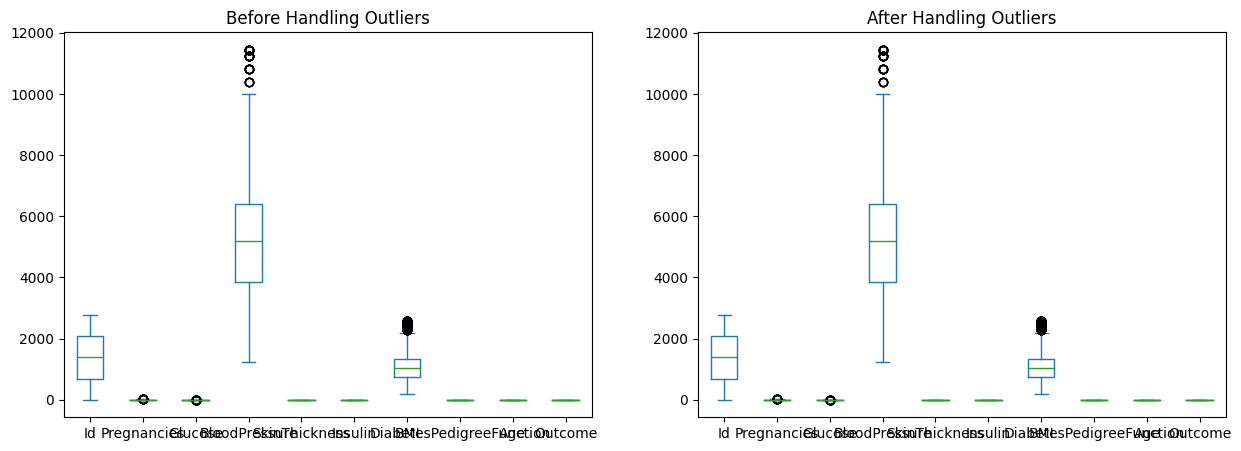

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
# Function to identify and handle outliers using the IQR method
def handle_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Apply transformation based on skewness
  skewness = df[column].skew()
  if skewness > 0:
    # Apply log transformation for positive skewness
    df[column] = np.log1p(df[column].clip(lower=lower_bound, upper=upper_bound))
  elif skewness < 0:
    # Apply square transformation for negative skewness
    df[column] = np.power(df[column].clip(lower=lower_bound, upper=upper_bound), 2)

  return df

# Handle outliers and get counts
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
  df = handle_outliers(df, column)
  outliers_count = (df[column] < df[column].quantile(0.25)) + (df[column] > df[column].quantile(0.75))
  print(f"Number of outliers in {column}: {outliers_count.sum()}")

# Print the number of outliers before and after handling
outliers_before = df.select_dtypes(include=['int64', 'float64']).apply(lambda x: (x < x.quantile(0.25)) + (x > x.quantile(0.75))).sum().sum()
outliers_after = df.select_dtypes(include=['int64', 'float64']).apply(lambda x: (x < x.quantile(0.25)) + (x > x.quantile(0.75))).sum().sum()
print(f"Number of outliers before handling: {outliers_before}")
print(f"Number of outliers after handling: {outliers_after}")

# Visualize outliers before and after handling using box plots

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df.select_dtypes(include=['int64', 'float64']).plot.box(ax=axes[0], title="Before Handling Outliers")
df.select_dtypes(include=['int64', 'float64']).plot.box(ax=axes[1], title="After Handling Outliers")
plt.show()


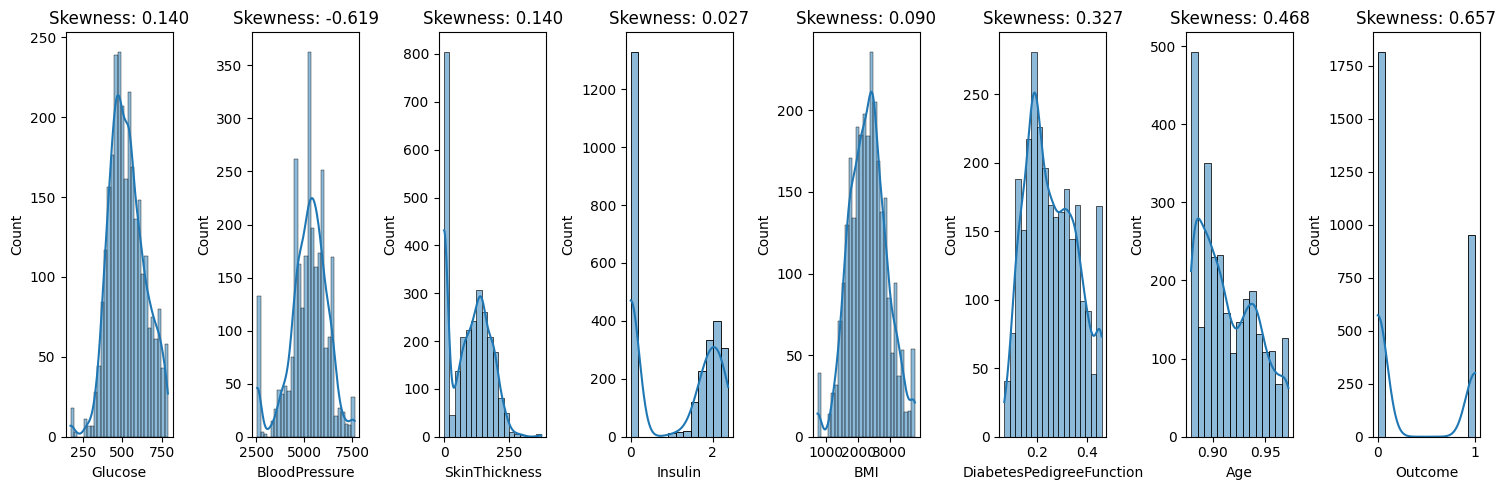

Skewness before handling:
Glucose                     0.140289
BloodPressure              -0.619266
SkinThickness               0.140198
Insulin                     0.026903
BMI                         0.089641
DiabetesPedigreeFunction    0.327183
Age                         0.468085
Outcome                     0.657465
dtype: float64


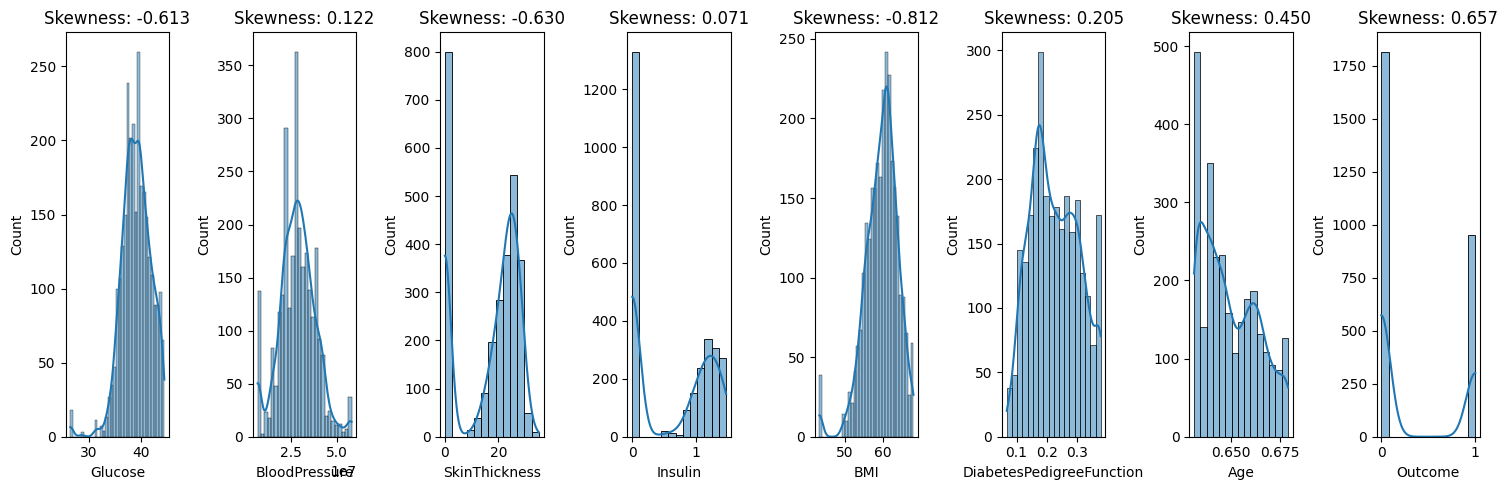

Skewness after handling:
Glucose                    -0.613245
BloodPressure               0.122345
SkinThickness              -0.630145
Insulin                     0.070802
BMI                        -0.812093
DiabetesPedigreeFunction    0.204508
Age                         0.450020
Outcome                     0.657465
dtype: float64
Skewness after log transformation:
Glucose                    -0.613245
BloodPressure               0.122345
SkinThickness              -0.630145
Insulin                     0.070802
BMI                        -0.812093
DiabetesPedigreeFunction    0.204508
Age                         0.450020
Outcome                     0.657465
dtype: float64
Skewness after power transformation:
Glucose                    -0.260422
BloodPressure               0.122345
SkinThickness              -0.136193
Insulin                     0.070802
BMI                        -0.488778
DiabetesPedigreeFunction    0.204508
Age                         0.450020
Outcome               

In [ ]:
# prompt: code for # Select relevant columns for analysis # Function to visualize skewness using histograms  # Remove empty subplots # Function to handle skewness using log transformation # Function to handle skewness using power transformation # Visualize skewness before handling # Calculate and print skewness before handling # Columns that need transformation # Handle skewness using log transformation

import matplotlib.pyplot as plt
import numpy as np
# Select relevant columns for analysis
relevant_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = df[relevant_columns]

# Function to visualize skewness using histograms
def visualize_skewness(data, columns, figsize=(15, 5)):
  fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=figsize)
  for i, col in enumerate(columns):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Skewness: {data[col].skew():.3f}')
    axes[i].set_xlabel(col)
  plt.tight_layout()
  plt.show()

# Remove empty subplots
def remove_empty_subplots(fig):
  for i in range(fig.get_axes().shape[0]):
    for j in range(fig.get_axes().shape[1]):
      if fig.get_axes()[i, j].get_children() == []:
        fig.delaxes(fig.get_axes()[i, j])
  fig.tight_layout()

# Function to handle skewness using log transformation
def handle_skewness_log(data, columns):
  for col in columns:
    if data[col].skew() > 0:
      data[col] = np.log1p(data[col])

# Function to handle skewness using power transformation
def handle_skewness_power(data, columns):
  for col in columns:
    if data[col].skew() < 0:
      data[col] = np.power(data[col], 2)

# Visualize skewness before handling
visualize_skewness(df, relevant_columns)

# Calculate and print skewness before handling
print("Skewness before handling:")
print(df[relevant_columns].skew())

# Columns that need transformation
columns_to_transform = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Handle skewness using log transformation
handle_skewness_log(df, columns_to_transform)

# Handle skewness using power transformation
handle_skewness_power(df, columns_to_transform)

# Visualize skewness after handling
visualize_skewness(df, relevant_columns)

# Calculate and print skewness after handling
print("Skewness after handling:")
print(df[relevant_columns].skew())
# Calculate and print skewness after log transformation
skewness_after_log = df.skew()
print(f"Skewness after log transformation:\n{skewness_after_log}")

# Handle skewness using power transformation
for col in columns_to_transform:
    power_transform(df, col)

# Calculate and print skewness after power transformation
skewness_after_power = df.skew()
print(f"Skewness after power transformation:\n{skewness_after_power}")


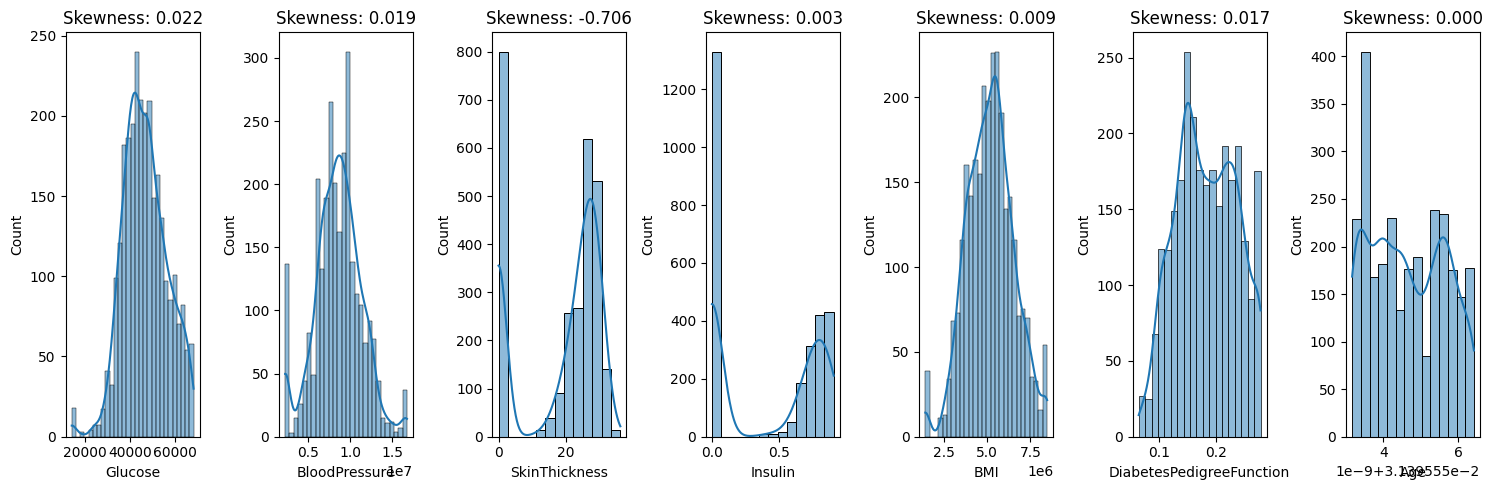

Skewness before Box-Cox transformation:
Glucose                     0.022291
BloodPressure               0.019179
SkinThickness              -0.706103
Insulin                     0.003041
BMI                         0.009288
DiabetesPedigreeFunction    0.017015
Age                         0.000000
dtype: float64
Skewness after Box-Cox transformation:
Glucose                     0.022291
BloodPressure               0.019179
SkinThickness              -0.706103
Insulin                     0.003041
BMI                         0.009288
DiabetesPedigreeFunction    0.017015
Age                         0.000000
dtype: float64
Lambda values:
Glucose: 1.5217163260601934
BloodPressure: 0.9262002548944661
SkinThickness: 0.3764021604360385
Insulin: -0.012087944148168188
BMI: 1.9711406601214443
DiabetesPedigreeFunction: -0.8628020393680994
Age: -31.851639088979216


In [ ]:

from scipy.stats import boxcox

# Define function to apply Box-Cox transformation
def box_cox_transform(data, columns):
  lambda_values = [] # Initialize a list to store lambda values
  for col in columns:
    data[col], lambda_value = boxcox(data[col] + 1)
    lambda_values.append(lambda_value) # Store the lambda value for each column
  return data, lambda_values # Return the transformed data and the list of lambda values

# Select relevant columns for analysis
relevant_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df = df[relevant_columns]

# Apply Box-Cox transformation
df, lambda_values = box_cox_transform(df, relevant_columns)

# Visualize skewness after handling
visualize_skewness(df, relevant_columns)
# prompt: in the above code show Skewness before Box-Cox transformation: also

skewness_before_boxcox = df.skew()
print("Skewness before Box-Cox transformation:")
print(skewness_before_boxcox)
# Calculate and print skewness after handling
print("Skewness after Box-Cox transformation:")
print(df[relevant_columns].skew())

# Print lambda values for each column
print("Lambda values:")
for col, lambda_value in zip(relevant_columns, lambda_values):
  print(f"{col}: {lambda_value}")

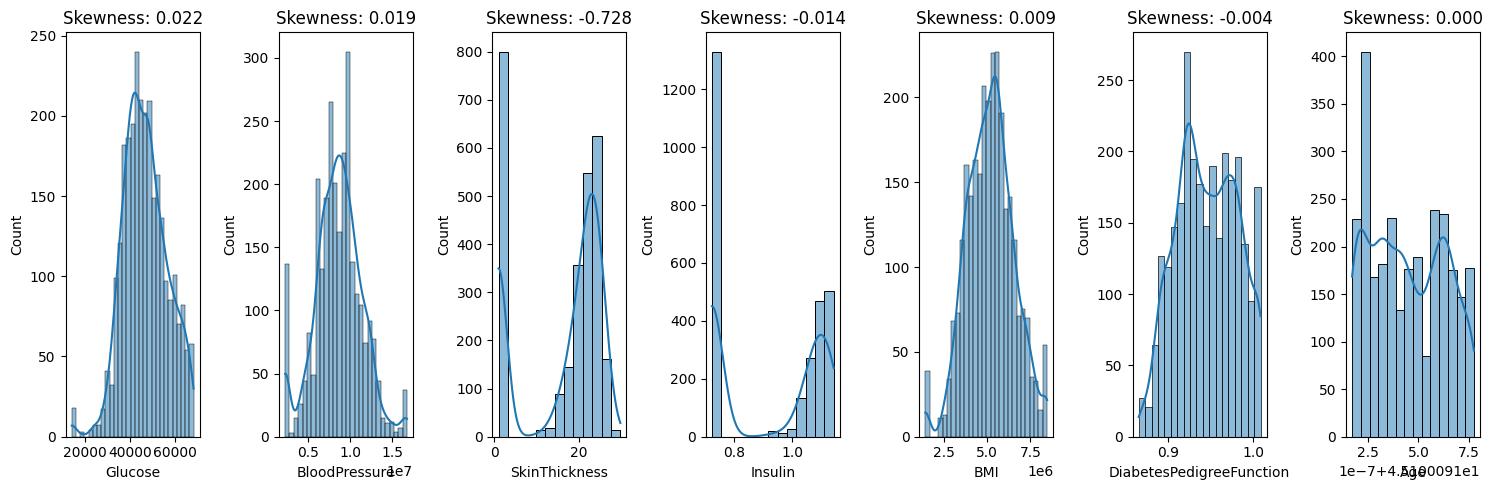

Skewness after Yeo-Johnson transformation:
Glucose                     0.022290
BloodPressure               0.019179
SkinThickness              -0.728206
Insulin                    -0.013603
BMI                         0.009288
DiabetesPedigreeFunction   -0.003568
Age                         0.000000
dtype: float64
Lambda values:
Glucose: 0.999998278653959
BloodPressure: 0.9999999411672361
SkinThickness: 0.9209754051450132
Insulin: 0.1280462809356025
BMI: 1.0000000873579182
DiabetesPedigreeFunction: 0.47617785498592735
Age: 8.377075897997624


In [ ]:
#  show Yeo-Johnson Transformation:

from scipy.stats import yeojohnson

def yeo_johnson_transform(data, columns):
  lambda_values = []
  for col in columns:
    data[col], lambda_value = yeojohnson(data[col] + 1)
    lambda_values.append(lambda_value)
  return data, lambda_values

relevant_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df = df[relevant_columns]

df, lambda_values = yeo_johnson_transform(df, relevant_columns)

visualize_skewness(df, relevant_columns)

skewness_after_yeojohnson = df.skew()
print("Skewness after Yeo-Johnson transformation:")
print(skewness_after_yeojohnson)

print("Lambda values:")
for col, lambda_value in zip(relevant_columns, lambda_values):
  print(f"{col}: {lambda_value}")


Skewness after root transformation:
Glucose                     0.022290
BloodPressure               0.019179
SkinThickness              -0.881541
Insulin                    -0.027639
BMI                         0.009288
DiabetesPedigreeFunction   -0.049172
Age                         0.000000
dtype: float64


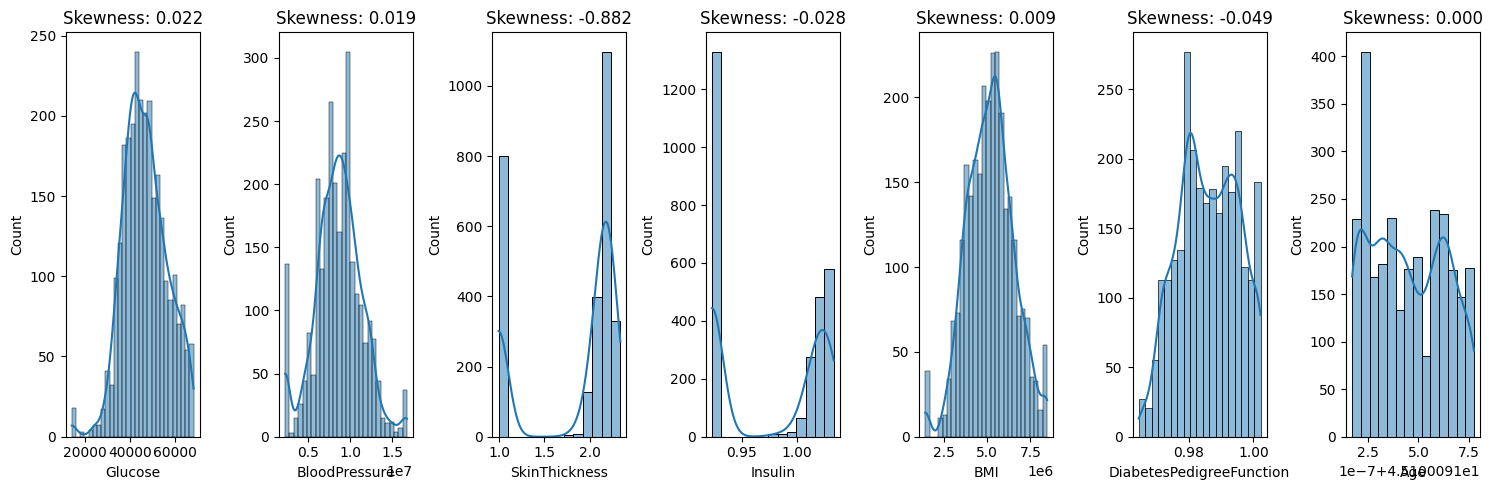

In [ ]:
#  Root Transformation

import numpy as np
# Function to handle skewness using root transformation
def handle_skewness_root(data, columns):
  for col in columns:
    if data[col].skew() < 0:
      data[col] = np.sqrt(data[col])

# Handle skewness using root transformation
handle_skewness_root(df, columns_to_transform)

# Calculate and print skewness after root transformation
skewness_after_root = df.skew()
print(f"Skewness after root transformation:\n{skewness_after_root}")
visualize_skewness(df, relevant_columns)

Skewness after reciprocal transformation:
Glucose                     0.022290
BloodPressure               0.019179
SkinThickness               0.919275
Insulin                     0.035579
BMI                         0.009288
DiabetesPedigreeFunction    0.079823
Age                         0.000000
dtype: float64


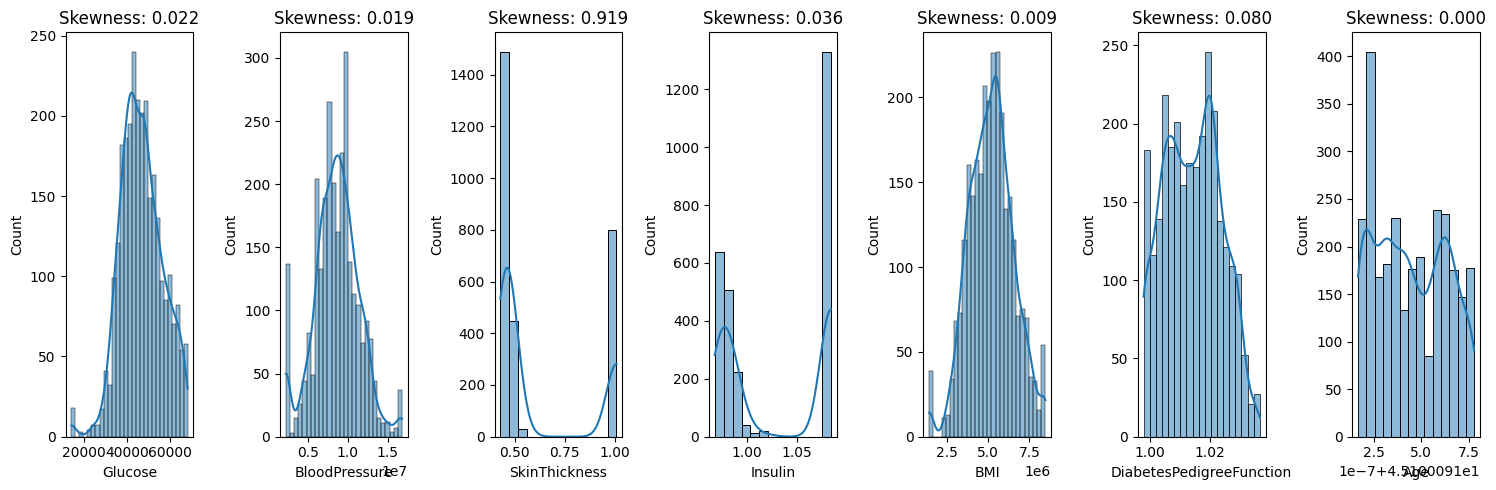

In [ ]:
#  Reciprocal Transformation

# Function to handle skewness using reciprocal transformation
def reciprocal_transform(data, columns):
  for col in columns:
    if data[col].skew() < 0:
      data[col] = 1 / data[col]

# Handle skewness using reciprocal transformation
reciprocal_transform(df, columns_to_transform)

# Calculate and print skewness after reciprocal transformation
skewness_after_reciprocal = df.skew()
print(f"Skewness after reciprocal transformation:\n{skewness_after_reciprocal}")
visualize_skewness(df, relevant_columns)

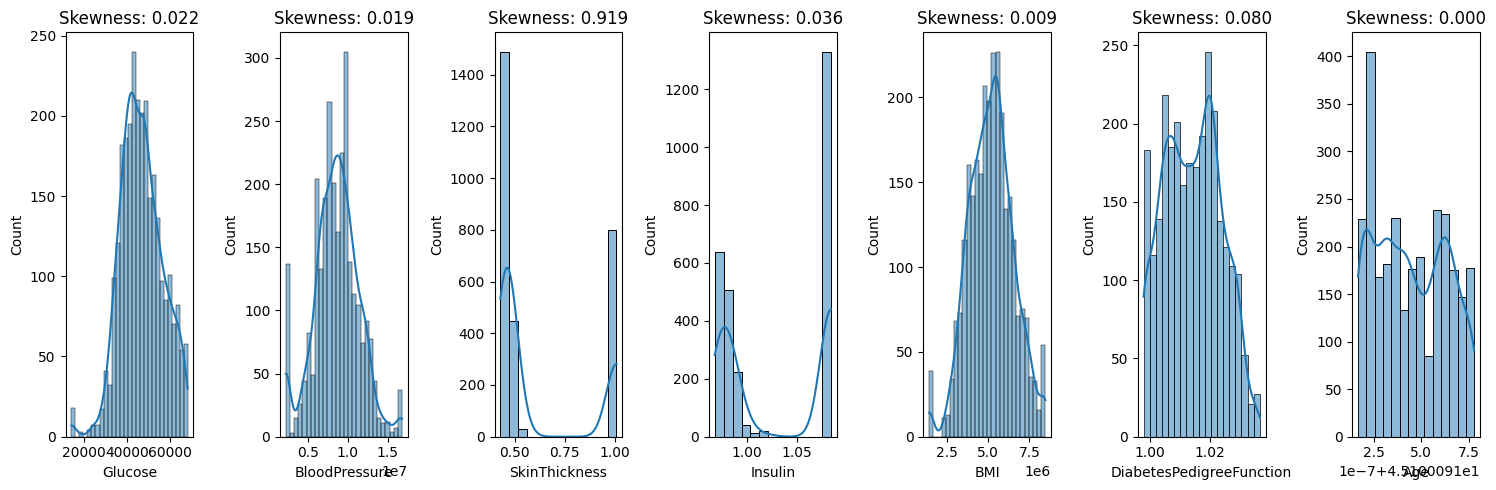

In [ ]:

# After reciprocal transformation
visualize_skewness(df, relevant_columns)


# Data Visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

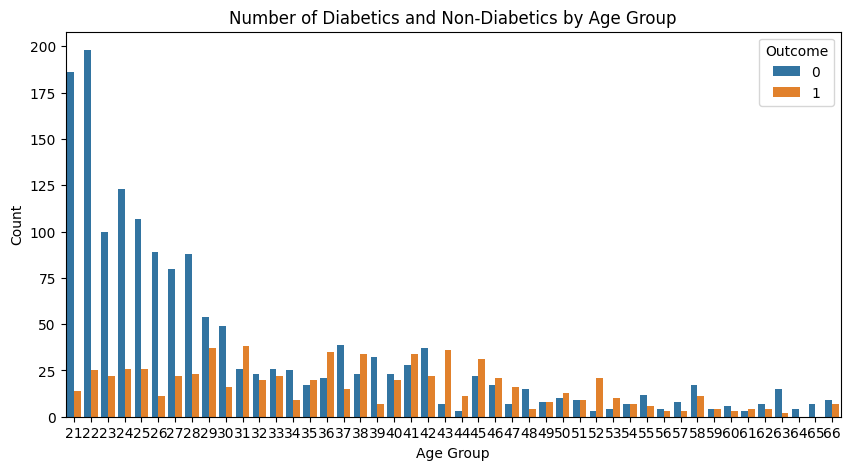

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and set its size
plt.figure(figsize=(10, 5))

# Create a countplot of the "Outcome" column, grouped by the "Age" column
sns.countplot(data=df, x="Age", hue="Outcome")

# Set the title and labels
plt.title("Number of Diabetics and Non-Diabetics by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")

# Show the plot
plt.show()



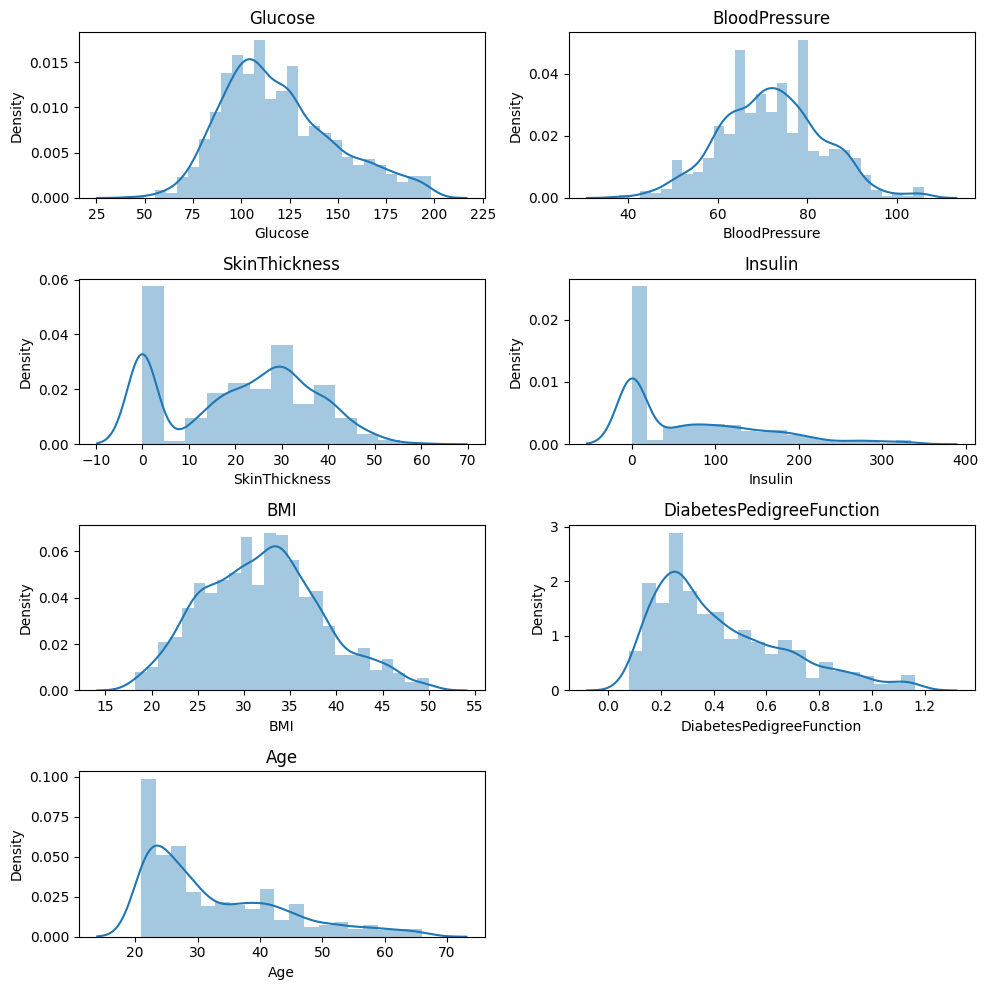

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a figure and set its size
plt.figure(figsize=(10, 10))

# Loop through each numerical column and create a distribution plot
for i, column in enumerate(numerical_columns, 1):
  plt.subplot(4, 2, i)
  sns.distplot(df[column])
  plt.title(column)

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()


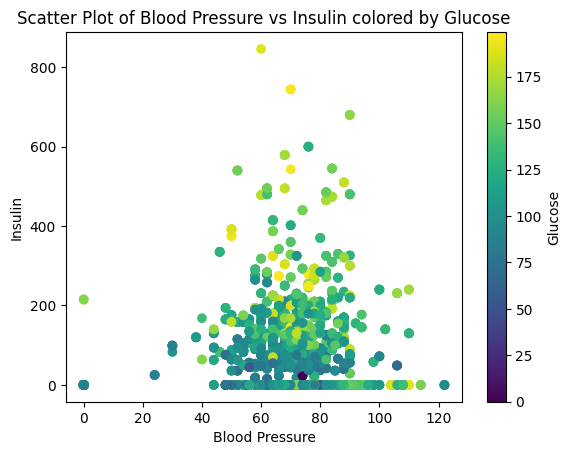

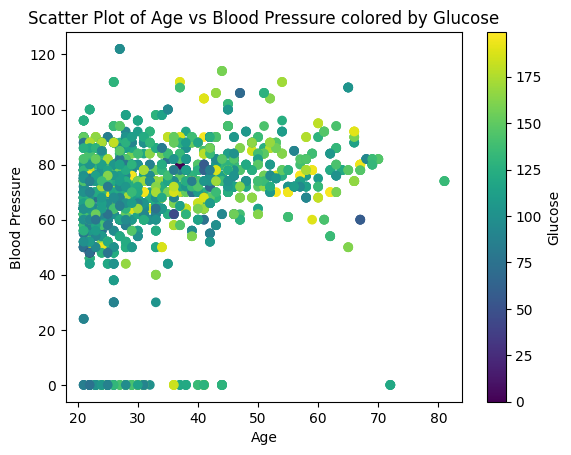

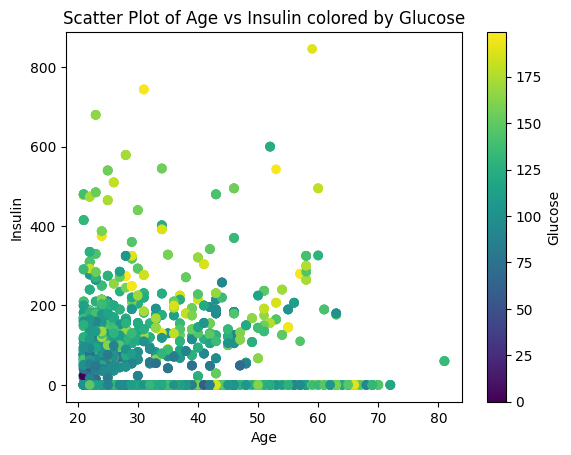

In [ ]:

plt.scatter(df['BloodPressure'], df['Insulin'], c=df['Glucose'], cmap='viridis')
plt.xlabel('Blood Pressure')
plt.ylabel('Insulin')
plt.title('Scatter Plot of Blood Pressure vs Insulin colored by Glucose')
plt.colorbar(label='Glucose')
plt.show()

plt.scatter(df['Age'], df['BloodPressure'], c=df['Glucose'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Scatter Plot of Age vs Blood Pressure colored by Glucose')
plt.colorbar(label='Glucose')
plt.show()

plt.scatter(df['Age'], df['Insulin'], c=df['Glucose'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Insulin')
plt.title('Scatter Plot of Age vs Insulin colored by Glucose')
plt.colorbar(label='Glucose')
plt.show()


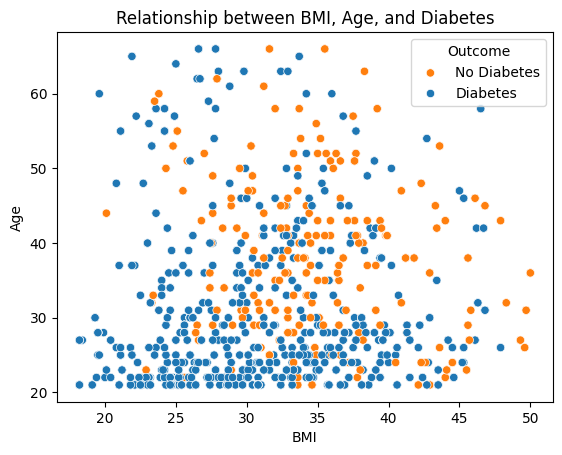

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of BMI vs. Age, colored by the 'Outcome' variable
sns.scatterplot(data=df, x="BMI", y="Age", hue="Outcome")

# Add a legend to explain the color coding
plt.legend(title="Outcome", labels=["No Diabetes", "Diabetes"])

# Add labels and title
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Relationship between BMI, Age, and Diabetes")

# Show the plot
plt.show()
